<a href="https://colab.research.google.com/github/megha-puthukudi/main-project/blob/VGG19_SEVERE/tried_vgg19_severe_serviritymain_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
80134624/80134624 [==============================] - 1s 0us/step


Epoch 1/100
26/26 [==============================] - 307s 11s/step - loss: 4.0877 - accuracy: 0.5062 - val_loss: 1.0682 - val_accuracy: 0.5813
Epoch 2/100
26/26 [==============================] - 15s 583ms/step - loss: 0.9590 - accuracy: 0.6064 - val_loss: 0.6624 - val_accuracy: 0.7000
Epoch 3/100
26/26 [==============================] - 16s 600ms/step - loss: 0.7265 - accuracy: 0.6839 - val_loss: 0.6231 - val_accuracy: 0.7437
Epoch 4/100
26/26 [==============================] - 15s 588ms/step - loss: 0.7519 - accuracy: 0.6795 - val_loss: 0.7021 - val_accuracy: 0.6438
Epoch 5/100
26/26 [==============================] - 16s 597ms/step - loss: 0.7107 - accuracy: 0.6819 - val_loss: 0.7240 - val_accuracy: 0.6687
Epoch 6/100
26/26 [==============================] - 16s 599ms/step - loss: 0.7231 - accuracy: 0.6522 - val_loss: 0.6852 - val_accuracy: 0.6562
Epoch 7/100
26/26 [==============================] - 15s 591ms/step - loss: 0.6855 - accuracy: 0.6819 - val_loss: 0.6183 - val_accuracy: 

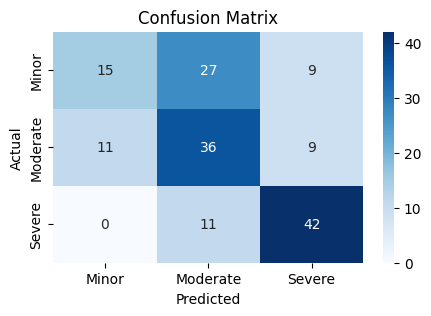

Recall: 0.5765
Precision: 0.5878
F1-score: 0.5623


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')

# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_updated_50epochs_severitymain_dataset_learningrae0001.h5')


Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Epoch 1/100
52/52 [==============================] - 21s 292ms/step - loss: 3.7534 - accuracy: 0.4478 - val_loss: 1.2582 - val_accuracy: 0.5682
Epoch 2/100
52/52 [==============================] - 16s 305ms/step - loss: 0.8550 - accuracy: 0.6189 - val_loss: 0.6678 - val_accuracy: 0.7159
Epoch 3/100
52/52 [==============================] - 16s 302ms/step - loss: 0.7905 - accuracy: 0.6505 - val_loss: 0.9851 - val_accuracy: 0.5170
Epoch 4/100
52/52 [==============================] - 15s 295ms/step - loss: 0.8162 - accuracy: 0.6456 - val_loss: 0.6638 - val_accuracy: 0.6932
Epoch 5/100
52/52 [==============================] - 16s 305ms/step - loss: 0.7830 - accuracy: 0.6396 - val_loss: 0.6718 - val_accuracy: 0.6932
Epoch 6/100
52/52 [==============================] - 16s 300ms/step - loss: 0.7732 - accuracy: 0.6396 - val_loss: 0.7130 - val_accuracy: 0.6364
Epoch 7/100
52/52 [==============================] - 15s 292ms/step - loss: 0.7446 - accuracy: 0.6517 - val_loss: 0.6550 - val_accuracy:

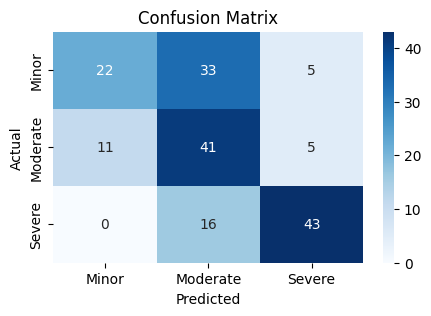

Recall: 0.6049
Precision: 0.6445
F1-score: 0.5996


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')

# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_batch16updated_50epochs_severitymain_dataset_learningrae0001.h5')


Found 840 images belonging to 3 classes.
Found 180 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


Epoch 1/100
52/52 [==============================] - 17s 304ms/step - loss: 3.0186 - accuracy: 0.5036 - val_loss: 0.7144 - val_accuracy: 0.6818
Epoch 2/100
52/52 [==============================] - 16s 305ms/step - loss: 0.8455 - accuracy: 0.6153 - val_loss: 0.6515 - val_accuracy: 0.6591
Epoch 3/100
52/52 [==============================] - 15s 297ms/step - loss: 0.7957 - accuracy: 0.6286 - val_loss: 0.6348 - val_accuracy: 0.6818
Epoch 4/100
52/52 [==============================] - 15s 294ms/step - loss: 0.7794 - accuracy: 0.6432 - val_loss: 0.6915 - val_accuracy: 0.6761
Epoch 5/100
52/52 [==============================] - 16s 305ms/step - loss: 0.7187 - accuracy: 0.6553 - val_loss: 0.6587 - val_accuracy: 0.6989
Epoch 6/100
52/52 [==============================] - 16s 303ms/step - loss: 0.7224 - accuracy: 0.6638 - val_loss: 0.6973 - val_accuracy: 0.6591
Epoch 7/100
52/52 [==============================] - 16s 300ms/step - loss: 0.7062 - accuracy: 0.6808 - val_loss: 0.6185 - val_accuracy:

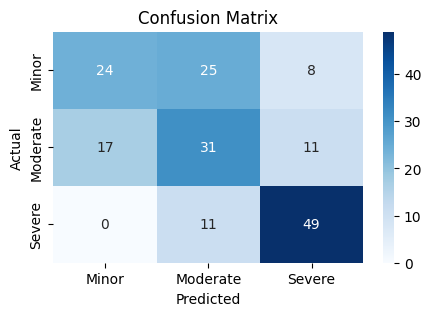

Recall: 0.5877
Precision: 0.5895
F1-score: 0.5825


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns

# Define your data directories
train_dir = '/content/drive/MyDrive/severity main/train'
val_dir = '/content/drive/MyDrive/severity main/validation'
test_dir = '/content/drive/MyDrive/severity main/test'

# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# Create data generators with additional augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of VGG19
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
predictions = Dense(3, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // batch_size)
train_loss, train_accuracy = model.evaluate(train_generator, steps=train_generator.n // batch_size)

# Print results
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy * 100:.2f}')
print(f'Train loss: {train_loss:.4f}')
print(f'Train accuracy: {train_accuracy * 100:.2f}')

# Calculate metrics
y_true = []
y_pred = []
for _ in range(test_generator.n // batch_size):
    batch_x, batch_y = next(test_generator)
    y_true.extend(np.argmax(batch_y, axis=1))
    y_pred.extend(np.argmax(model.predict(batch_x), axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Display metrics
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1-score: {f1:.4f}')

# Save the model
model.save('/content/drive/MyDrive/colabtest/another_vehicle_severity_VGG19_batch16updated_50epochs_severitymain_dataset_learningrae0001.h5')
